In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from sklearn import cluster
from collections import Counter
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
print(os.listdir())

['.ipynb_checkpoints', 'elliptic_txs_edgelist.csv', 'Untitled.ipynb']


# importing data

In [3]:
df = pd.read_csv('elliptic_txs_edgelist.csv').iloc[:,0:2]

# checking for null values if any

In [4]:
df.isnull().values.any()

False

# basic stats about columns

In [5]:
df.describe(include ='all')

,txId1,txId2
count,2.343550e+05,2.343550e+05
mean,1.612218e+08,1.686881e+08
std,1.134457e+08,1.110120e+08
min,1.076000e+03,1.076000e+03
25%,6.933967e+07,7.342958e+07
50%,1.555782e+08,1.575814e+08
75%,2.433861e+08,2.454072e+08
max,4.032446e+08,4.032446e+08


# plotting digraph (sociogram)

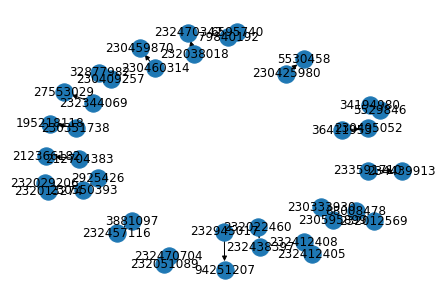

In [7]:
short_edges = df.iloc[0:20,0:2]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())

nx.draw(graph, with_labels=True)

# generating adjacency matrix

In [9]:
Adj_mat = nx.to_numpy_matrix(graph)

# Clustering Using K-Means

In [10]:
segment = df.iloc[0:234,0:2]
graph = nx.from_pandas_edgelist(segment, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())

# Degree Distribution Plot

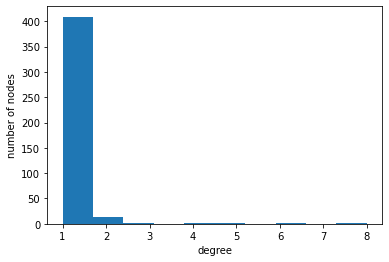

In [11]:
degrees = [graph.degree(n) for n in graph.nodes()]
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.hist(degrees)
plt.show()

# nx.draw(graph, with_labels=False)

In [12]:
Adj_mat = nx.to_numpy_matrix(graph)

# elbow method

In [13]:
cost =[]
for i in range(1, 11):
    # calculates squared error
    # for the clustered points
    cost.append(cluster.KMeans(n_clusters=i, n_init=20).fit(Adj_mat).inertia_)  

# plot the cost against K values

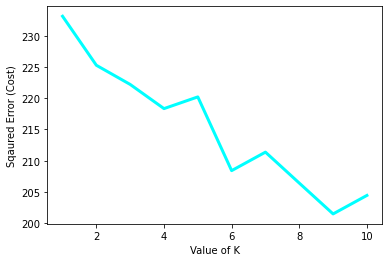

In [15]:
plt.plot(range(1, 11), cost, color ='cyan', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() 

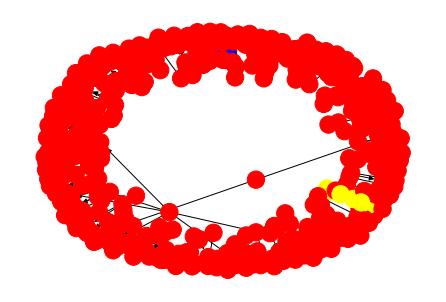

In [16]:
klabels = cluster.KMeans(n_clusters=3, n_init=20).fit(Adj_mat).labels_

color_map = []
for i in range(len(klabels)):
    if klabels[i] == 0:
        color_map.append('blue')
    elif klabels[i] == 1:
        color_map.append('red')
    elif klabels[i] == 2:
        color_map.append('yellow')
        
nx.draw(graph, node_color = color_map , with_labels=False)

# plotting membership of each cluster

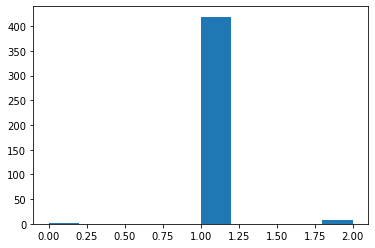

Counter({1: 419, 2: 8, 0: 2})
silhouette score:  0.3170492575038293

davies_bouldin score:  0.5412811564441937


In [18]:
plt.hist(klabels)
plt.show()
print(Counter(klabels))
# analysis (The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.)
print("silhouette score: ", silhouette_score(Adj_mat, klabels))
# clusters which are farther apart and less dispersed will result in a better score.
#The minimum score is zero, with lower values indicating better clustering.
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))

# hierarchical clustering

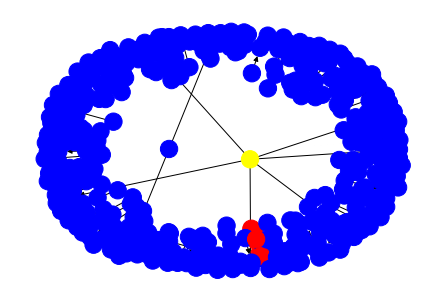

In [21]:
hlabels = cluster.AgglomerativeClustering( n_clusters=3,linkage="ward").fit(Adj_mat).labels_

color_map = []
for i in range(len(hlabels)):
    if hlabels[i] == 0:
        color_map.append('blue')
    elif hlabels[i] == 1:
        color_map.append('red')
    elif hlabels[i] == 2:
        color_map.append('yellow')
        
nx.draw(graph, node_color = color_map , with_labels=False)

# plotting membership of each cluster

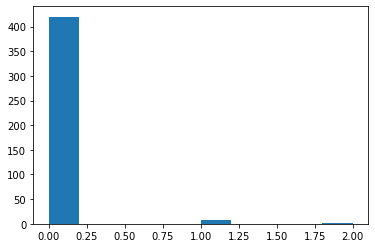

Counter({0: 420, 1: 8, 2: 1})
silhouette score:  0.3149407282288103

davies_bouldin score:  0.5412811564441937


In [22]:
plt.hist(hlabels)
plt.show()
print(Counter(hlabels))
# analysis (Internal indices are used to measure the goodness of a clustering structure without external information)
print("silhouette score: ", silhouette_score(Adj_mat, hlabels))
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))

# spectral clustering


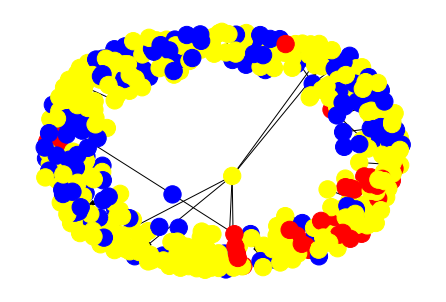

In [23]:
slabels = cluster.SpectralClustering(n_clusters=3, affinity="precomputed", n_init=200).fit(Adj_mat).labels_

color_map = []
for i in range(len(slabels)):
    if slabels[i] == 0:
        color_map.append('blue')
    elif slabels[i] == 1:
        color_map.append('red')
    elif slabels[i] == 2:
        color_map.append('yellow')
        
nx.draw(graph, node_color = color_map , with_labels=False)

# plt.hist(slabels)

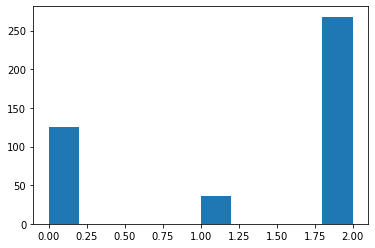

Counter({2: 268, 0: 125, 1: 36})


In [29]:
plt.hist(slabels)

# plotting membership of each cluster

silhouette score:  -0.015588624879772427

davies_bouldin score:  0.5412811564441937


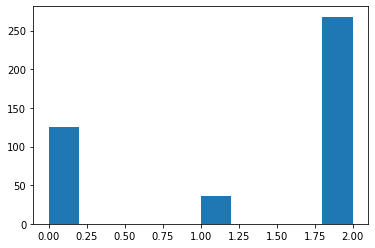

In [30]:
plt.hist(slabels)
# analysis
print("silhouette score: ", silhouette_score(Adj_mat, slabels))
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))